In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv("chronic_disease_prediction_dataset.csv")

In [153]:
df.head()

,Patient_ID,Age,Gender,BMI,Smoking,AlcoholIntake,PhysicalActivity,DietQuality,SleepHours,BloodPressure,Cholesterol,Glucose,FamilyHistory,StressLevel,HasChronicDisease
0,P0001,69,Female,20.7,No,Moderate,3.9,Average,6.7,110,215,171,Yes,6,Yes
1,P0002,32,Male,30.0,No,Moderate,0.7,Poor,6.5,139,94,101,No,5,No
2,P0003,89,Other,31.4,No,Moderate,3.3,Good,4.5,142,210,137,No,7,Yes
3,P0004,78,Male,24.7,No,High,3.7,Average,6.4,130,142,66,No,6,No
4,P0005,38,Male,24.6,No,Moderate,5.6,Average,7.9,122,223,92,Yes,2,No


In [154]:
df.describe()

,Age,BMI,PhysicalActivity,SleepHours,BloodPressure,Cholesterol,Glucose,StressLevel
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,52.870667,27.095467,2.988733,6.779467,129.814667,200.382000,105.784000,5.089333
std,20.857228,5.026032,1.494522,1.149472,14.773281,34.969367,25.574911,1.959229
min,18.000000,12.000000,0.000000,2.100000,79.000000,94.000000,22.000000,1.000000
25%,34.000000,23.600000,1.900000,6.000000,120.000000,177.000000,88.000000,4.000000
50%,53.000000,27.200000,2.900000,6.800000,129.000000,201.000000,106.000000,5.000000
75%,71.000000,30.425000,4.000000,7.600000,139.000000,223.000000,123.000000,6.000000
max,89.000000,46.600000,8.300000,10.300000,181.000000,320.000000,187.000000,10.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1500 non-null   object 
 1   Age                1500 non-null   int64  
 2   Gender             1500 non-null   object 
 3   BMI                1500 non-null   float64
 4   Smoking            1500 non-null   object 
 5   AlcoholIntake      1500 non-null   object 
 6   PhysicalActivity   1500 non-null   float64
 7   DietQuality        1500 non-null   object 
 8   SleepHours         1500 non-null   float64
 9   BloodPressure      1500 non-null   int64  
 10  Cholesterol        1500 non-null   int64  
 11  Glucose            1500 non-null   int64  
 12  FamilyHistory      1500 non-null   object 
 13  StressLevel        1500 non-null   int64  
 14  HasChronicDisease  1500 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 175.9+ KB


# EDA


In [156]:
df['Gender'].value_counts()

Gender
Female    718
Male      711
Other      71
Name: count, dtype: int64

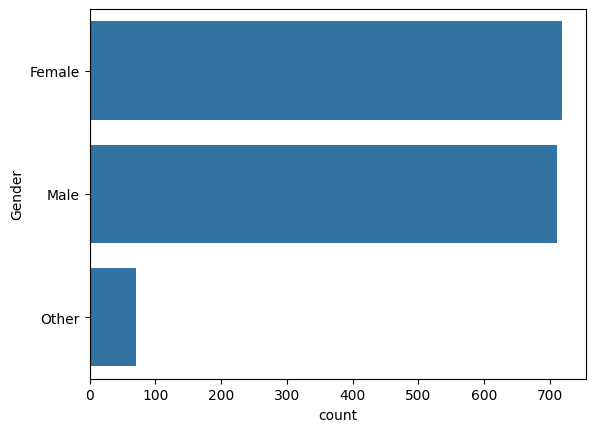

In [157]:
sns.countplot(df['Gender'])
plt.show()

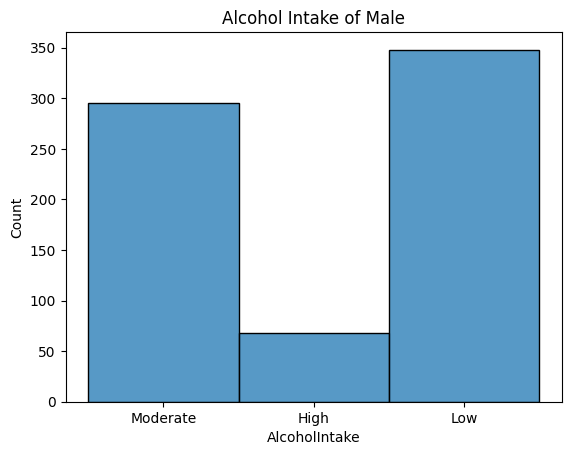

In [158]:
sns.histplot(df[df['Gender']=='Male']['AlcoholIntake'])
plt.title("Alcohol Intake of Male")
plt.show()

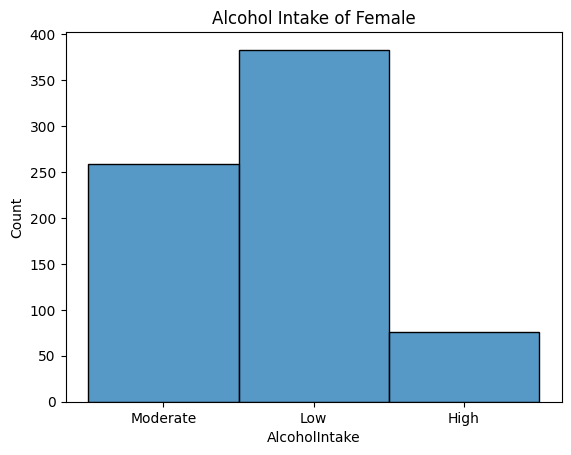

In [159]:
sns.histplot(df[df['Gender']=='Female']['AlcoholIntake'])
plt.title("Alcohol Intake of Female")
plt.show()

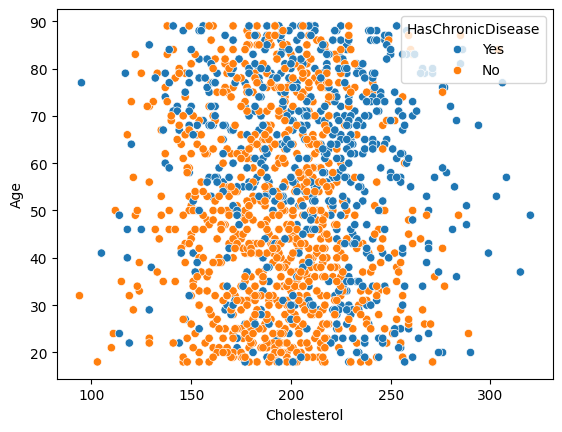

In [160]:
sns.scatterplot(x= 'Cholesterol',y = 'Age',data = df,hue =df['HasChronicDisease'])
plt.show()

In [161]:
smk = df['Smoking'].value_counts()

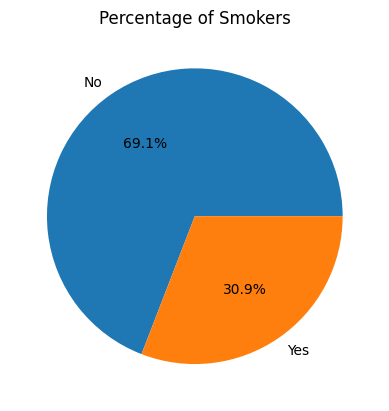

In [162]:
plt.pie(smk,labels = smk.index,autopct = '%1.1f%%')
plt.title("Percentage of Smokers")
plt.show()

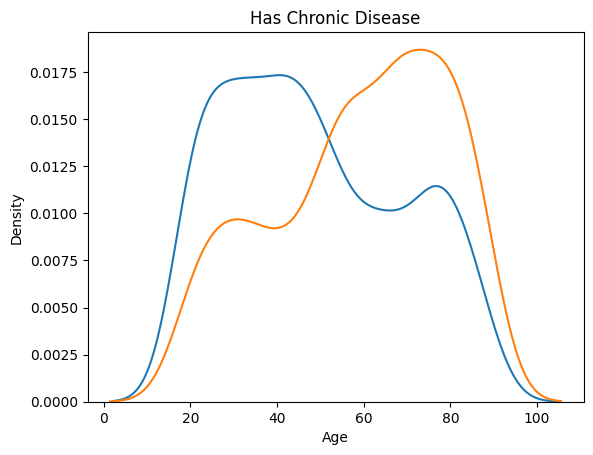

In [163]:
from sklearn.preprocessing import LabelEncoder

ss = LabelEncoder()
df['HasChronicDisease']=ss.fit_transform(df['HasChronicDisease'])
sns.kdeplot(df[df['HasChronicDisease']==0]['Age'])
sns.kdeplot(df[df['HasChronicDisease']==1]['Age'])
plt.title("Has Chronic Disease")
plt.show()

# Preprocessing

In [164]:
df.head()

,Patient_ID,Age,Gender,BMI,Smoking,AlcoholIntake,PhysicalActivity,DietQuality,SleepHours,BloodPressure,Cholesterol,Glucose,FamilyHistory,StressLevel,HasChronicDisease
0,P0001,69,Female,20.7,No,Moderate,3.9,Average,6.7,110,215,171,Yes,6,1
1,P0002,32,Male,30.0,No,Moderate,0.7,Poor,6.5,139,94,101,No,5,0
2,P0003,89,Other,31.4,No,Moderate,3.3,Good,4.5,142,210,137,No,7,1
3,P0004,78,Male,24.7,No,High,3.7,Average,6.4,130,142,66,No,6,0
4,P0005,38,Male,24.6,No,Moderate,5.6,Average,7.9,122,223,92,Yes,2,0


In [165]:
df.drop(['Patient_ID'],axis = 1,inplace=True)

In [166]:
df.head()

,Age,Gender,BMI,Smoking,AlcoholIntake,PhysicalActivity,DietQuality,SleepHours,BloodPressure,Cholesterol,Glucose,FamilyHistory,StressLevel,HasChronicDisease
0,69,Female,20.7,No,Moderate,3.9,Average,6.7,110,215,171,Yes,6,1
1,32,Male,30.0,No,Moderate,0.7,Poor,6.5,139,94,101,No,5,0
2,89,Other,31.4,No,Moderate,3.3,Good,4.5,142,210,137,No,7,1
3,78,Male,24.7,No,High,3.7,Average,6.4,130,142,66,No,6,0
4,38,Male,24.6,No,Moderate,5.6,Average,7.9,122,223,92,Yes,2,0


In [167]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

ss = StandardScaler()
le = LabelEncoder()
ohe = OneHotEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Smoking'] = le.fit_transform(df['Smoking'])
df['DietQuality'] = le.fit_transform(df['DietQuality'])
df['FamilyHistory'] = le.fit_transform(df['FamilyHistory'])
df['AlcoholIntake'] = le.fit_transform(df['AlcoholIntake'])

In [168]:
df

,Age,Gender,BMI,Smoking,AlcoholIntake,PhysicalActivity,DietQuality,SleepHours,BloodPressure,Cholesterol,Glucose,FamilyHistory,StressLevel,HasChronicDisease
0,69,0,20.7,0,2,3.9,0,6.7,110,215,171,1,6,1
1,32,1,30.0,0,2,0.7,2,6.5,139,94,101,0,5,0
2,89,2,31.4,0,2,3.3,1,4.5,142,210,137,0,7,1
3,78,1,24.7,0,0,3.7,0,6.4,130,142,66,0,6,0
4,38,1,24.6,0,2,5.6,0,7.9,122,223,92,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,31,1,28.5,0,2,0.4,0,6.0,128,173,136,1,4,0
1496,29,1,24.4,0,2,2.5,1,6.2,128,159,117,0,5,0
1497,29,1,33.8,1,1,1.2,0,7.4,128,129,121,0,4,1
1498,30,0,29.1,1,1,4.8,0,8.7,143,200,117,1,3,1


# Scaling 


In [169]:
x = df.drop(['HasChronicDisease'],axis=1)
y = df['HasChronicDisease']

In [170]:
x = np.array(x)
y = np.array(y)

In [171]:
print(x.shape)
print(y.shape)

(1500, 13)
(1500,)


In [172]:
x = ss.fit_transform(x)

In [173]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

# Model Training

**Using Perceptron**

In [174]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

p = Perceptron()
p.fit(x_train,y_train)

p_pred = p.predict(x_test)

In [175]:
p_auc = accuracy_score(p_pred,y_test)
print("Perceptron accuracy = ",accuracy_score(p_pred,y_test))

Perceptron accuracy =  0.7533333333333333


**Using Logistic Regression**

In [176]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

lr_pred = lr.predict(x_test)

In [177]:
lr_auc = accuracy_score(lr_pred,y_test)
print("Logistic Regression accuracy = ",accuracy_score(lr_pred,y_test))

Logistic Regression accuracy =  0.8633333333333333


**Using Decision Trees**

In [178]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 8 ,min_samples_leaf=10,criterion = 'gini',splitter = 'best',random_state = 42 )

dtc.fit(x_train,y_train)

dtc_pred = dtc.predict(x_test)

dtc_auc = accuracy_score(dtc_pred,y_test)
print("Decision Trees accuracy = ",accuracy_score(dtc_pred,y_test))

Decision Trees accuracy =  0.92


**Using Random Forest**

In [179]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50,max_depth = 10, criterion = 'gini',n_jobs = -1,random_state=42)

rfc.fit(x_train,y_train)

rfc_pred = rfc.predict(x_test)

In [180]:
rfc_auc = accuracy_score(rfc_pred,y_test)
print("Random Forest accuracy = ",accuracy_score(rfc_pred,y_test))

Random Forest accuracy =  0.9666666666666667


In [181]:
from sklearn.metrics import accuracy_score

train_pred = dtc.predict(x_train)
print("Train accuracy:", accuracy_score(y_train, train_pred))

test_pred = dtc.predict(x_test)
print("Test accuracy:", accuracy_score(y_test, test_pred))


Train accuracy: 0.95
Test accuracy: 0.92


In [182]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    rfc, x, y,
    cv=5,
    scoring='accuracy'
)

print("CV scores:", scores)
print("Mean CV accuracy:", scores.mean())


CV scores: [0.96       0.97       0.96333333 0.95       0.94333333]
Mean CV accuracy: 0.9573333333333334


In [189]:
aucs = {
        'Logistic Regression' : lr_auc,
        'Perceptron' : p_auc,
        'Decision Trees' : dtc_auc,
        'Random Forest' : rfc_auc
    }
model = list(aucs.keys())
accuracy = list(aucs.values())

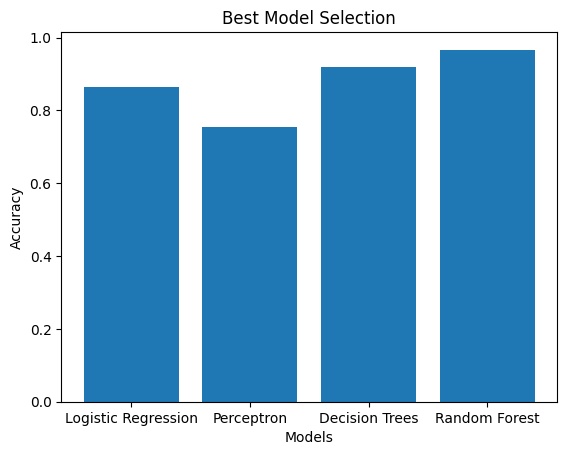

In [198]:
plt.figure()
plt.bar(model,accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Best Model Selection")
plt.show()